In [ ]:
!pip install arviz
!pip install pymc3==3.8

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn
import theano.tensor as tt
import warnings
from IPython.core.pylabtools import figsize
import seaborn as sns
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score, 
                             precision_recall_curve) 
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv('preprocessed.csv',sep = ',')
#def format_data(df):
#    print(df.info())
#    # Targets are final grade of student
#    labels = df['units_sold']
#    normalized_df=( labels-labels.mean())/ labels.std()
#    return normalized_df
#df=format_data(df)

In [ ]:
df.head()

,Unnamed: 0,price,retail_price,units_sold,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,tag_quality,tag_count,title_localised,com_same_name,subtitle_rating,discount_rate,merch_pop_proc,color__Blue,color__Pink,color__RED,color__Rose red,color__applegreen,color__apricot,color__army,color__army green,color__beige,...,color__pink,color__pink & black,color__pink & blue,color__pink & grey,color__pink & white,color__prussianblue,color__purple,color__rainbow,color__red,color__red & blue,color__red & yellow,color__redgold,color__silver,color__star,color__tan,color__violet,color__watermelonred,color__white,color__white & black,color__white & red,color__whiteother,color__whitestripe,color__wine,color__wine red,color__yellow,size__M,size__OTHER,size__S,size__XL,size__XS,size__XXL,size__XXS,size__XXXS,size__XXXXL,size__XXXXXL,country__CN,country__GB,country__SG,country__US,country__VE
0,0,16.00,14,100,0,3.76,0.481481,0.148148,0.185185,0.018519,0.166667,0,0,0,0,50,4,0,34,50,1.0,568,4.128521,0,0.7,24,0,1,0,-0.142857,0.095070,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,8.00,22,20000,1,3.45,0.369845,0.167400,0.182233,0.104971,0.175550,0,0,0,0,50,2,0,41,50,1.0,17752,3.899673,0,0.5,15,1,1,1,0.636364,0.345595,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,2,8.00,43,100,0,3.57,0.357143,0.285714,0.142857,0.000000,0.214286,0,0,0,0,1,3,0,36,50,1.0,295,3.989831,0,0.3,19,1,1,1,0.813953,0.047458,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,3,8.00,8,5000,1,4.03,0.509499,0.205527,0.150259,0.072539,0.062176,0,0,0,0,50,2,0,41,50,NaN,23832,4.020435,0,0.6,18,1,1,0,0.000000,0.024295,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,2.72,3,100,1,3.10,0.300000,0.200000,0.100000,0.100000,0.300000,0,0,0,0,1,1,0,35,50,1.0,14482,4.001588,0,0.6,13,1,0,1,0.093333,0.001381,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
labels = df['units_sold']
normalized_df=( labels-labels.mean())/ labels.std()

normalized_df.head()

0   -0.453059
1    1.673801
2   -0.453059
3    0.070640
4   -0.453059
Name: units_sold, dtype: float64

In [ ]:

#The first model with priors having uniform distributions
lower=-10**6
higher=10**6
with pm.Model() as first_model:
    #priors on parameters
    beta_0=pm.Uniform('beta_0', lower=0, upper= 20)
    beta_rating=pm.Uniform('beta_rating',0, 5)
    beta_merch_pop_proc=pm.Uniform('beta_merch_pop_proc', df['merch_pop_proc'].min(), df['merch_pop_proc'].max())
    beta_price=pm.Uniform('beta_price',df['price'].min(), df['price'].max())
    beta_retail_price=pm.Uniform('beta_retail_price', df['retail_price'].min(), df['retail_price'].max())
    #beta_humid_ratio=pm.Uniform('beta_humid_ration', lower, higher)
    
    #the probability of belonging to class 1
    p = pm.Deterministic('p',beta_0+pm.math.dot(beta_rating,df['rating'])+
                               pm.math.dot(beta_merch_pop_proc,df['merch_pop_proc'])+
                               pm.math.dot(beta_price,df['price'])+
                               pm.math.dot(beta_retail_price,df['retail_price']))
                              #  pm.math.dot(beta_retail_price,df['retail_price']))
with first_model:
    #fit the data 
    observed=pm.Categorical("y", p, observed=normalized_df)
    # start=pm.find_MAP()
    # step=pm.Metropolis()
    
    #samples from posterior distribution 
    trace=pm.sample(draws=3000, tune = 500)
    # burned_trace=trace[15000:]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta_retail_price, beta_price, beta_merch_pop_proc, beta_rating, beta_0]
Sampling chain 1, 0 divergences: 100%|██████████| 3500/3500 [00:08<00:00, 417.68it/s]


/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75ee697e48>,
      dtype=object)

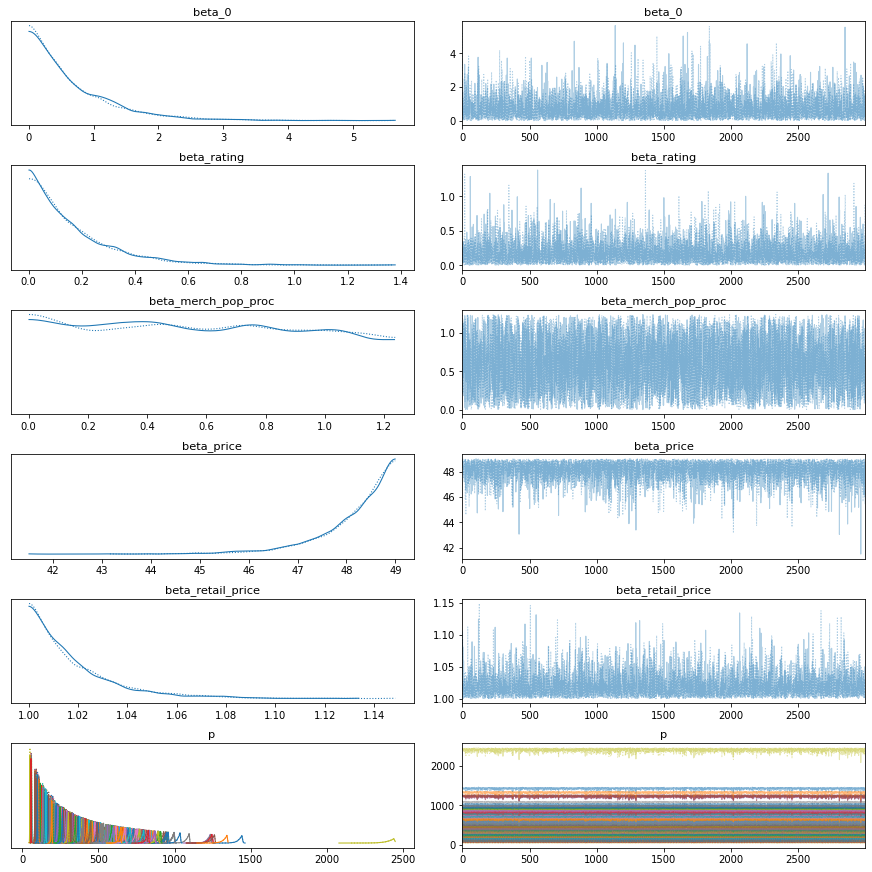

In [ ]:
pm.traceplot(trace)
# plt.show()

NameError: ignored

# 新增區段